# 1. Load dataset
#### For this programming assignment, you are provided with a dataset of handwritten letters and expected to build a CNN model that classifies given image into one of the pre-defined 28 categories. The dataset is provided in two files: train and test sets.

#### You will need to read the data from data files (HandChars32_150_Train.txt and HandChars32_50_Test.txt). The columns are separated by “#” sign. See the description of the columns below:
- PatN – index (label) of image
- PatType – written form of the letter
- PatProb - coefficient of correctness of writing the prototype [0, .., 10].
- SizeH, SizeW – height and width of the image, respectively
- Data – pixels of the grayscale image
#### For building CNN model, you will need to use PatN and Data columns.

#### Once you read the data into a pandas DataFrame, you will need to convert Data column entries into numpy arrays of shape (32, 32). You can do so by first converting to lists of integers and then reshaping respective numpy arrays.

In [7]:
import pandas as pd
df = pd.read_csv("HandChars32_150_Train.txt", sep='#')
df1 = pd.read_csv("HandChars32_50_Test.txt", sep = '#')
df1 = df1[df1['PatType'] == 0]

In [8]:
import numpy as np

x_train = []
for entry in df['Data']:
    l = list(entry)
    l = np.array(l, dtype=float)
    l = l.reshape(32, 32)
    x_train.append(l)
x_train = np.array(x_train)

y_train = df['PatN'].apply(lambda x: int(x))

In [9]:
df['PatType'].value_counts()

0    4200
Name: PatType, dtype: int64

In [10]:
df1['PatType'].value_counts()

0    1207
Name: PatType, dtype: int64

In [11]:
x_test = []
for entry in df1['Data']:
    l = list(entry)
    l = np.array(l, dtype=float)
    l = l.reshape(32, 32)
    x_test.append(l)
x_test = np.array(x_test)

y_test = df1['PatN'].apply(lambda x: int(x))

# 2. Visualization
#### Visualize some sample images from both train and test sets.

#### You can use plt.imshow for this purpose.

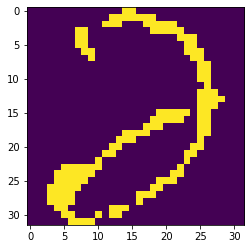

In [12]:
import numpy as np
from matplotlib import pyplot as plt

plt.imshow(x_train[1000])
plt.show()

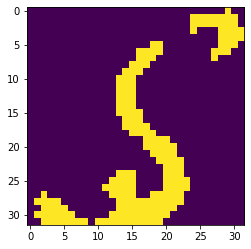

In [13]:
import numpy as np
from matplotlib import pyplot as plt

plt.imshow(x_test[1000])
plt.show()

# 3. Data preparation
#### The input to your model should have shape (4200, 32, 32, 1). If your Data column is in correct shape (4200 rows of (32, 32) numpy array), you can use `stack` and `expand_dims` functions to get the desired shape. Make sure you provide correct axis when expanding the dimensions.

In [14]:
print(x_train.shape, x_test.shape)

(4200, 32, 32) (1207, 32, 32)


In [15]:
x_train = np.expand_dims(x_train, axis = 3)
x_test = np.expand_dims(x_test, axis = 3)

In [16]:
print(x_train.shape, x_test.shape)

(4200, 32, 32, 1) (1207, 32, 32, 1)


#### The labels are in the PatN column of the data. You will need to one-hot encode the labels. You are expected to use `to_categorical` function from tensorflow.keras.utils. You will need to provide unique labels which you can find from the PatN column. Your labels for training and test sets must be (4200, 28) and (1400, 28), respectively.

In [17]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 28)
y_test = to_categorical(y_test, num_classes = 28)

In [18]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# 4. Modeling
#### You are expected to build a convolutional neural network and:
- Train it on the training data
- Perform hyperparameter tuning if needed
- Experiment with different designs (layers, layer units, convolutional layers, pooling layers, filters, filter sizes, padding, epochs, etc.)
- Evaluate the model using test set
- Achieve test accuracy of ~85%
#### You are expected to use Tensorflow library. You may need to install it first.
#### You will be using `Sequential` module from tensoflow.keras. For an example of `Sequential` model, see the "Tackling Fashion MNIST With a CNN" section of the following notebook:
https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb
#### You can start with a simple neural network and add convolution and pooling layers as needed.
#### You can choose 
#### Experiment with different settings.

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

#### Build a CNN model with the following details:
`Convolution layer with 64 filters of size (5, 5), SAME padding and ReLU activation
Pooling layer with size (2, 2) and strides (2, 2)
Second convolution layer with 128 filters of size (5, 5), SAME padding and ReLU activation
Another pooling layer with same settings as previous
Flattening layer
Dense layer with 1024 neurons and ReLU activation
Second dense layer with same configuration as previous
Dense layer with 28 neurons and softmax activation
`
#### Your model should have 9,674,524 parameters. You can check it by calling `summary` method on your model.

In [20]:
model = keras.Sequential([
    keras.Input(shape=(32, 32, 1)),
    layers.Conv2D(64, kernel_size = (5, 5), padding='SAME', activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(128, kernel_size=(5, 5),padding='SAME', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(28, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8

#### Train the model for 5-10 epochs with batch size of 32, RMSprop as optimizer, categorical crossentropy as loss, and accuracy as metric.

In [22]:
epochs = 5
batch_size = 32
model.compile()
model.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', 
               metrics = ['accuracy'])

In [23]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/5
132/132 [==============================] - 23s 168ms/step - loss: 1.0319 - accuracy: 0.7045
Epoch 2/5
132/132 [==============================] - 23s 171ms/step - loss: 0.2049 - accuracy: 0.9345
Epoch 3/5
132/132 [==============================] - 25s 191ms/step - loss: 0.1091 - accuracy: 0.9669
Epoch 4/5
132/132 [==============================] - 27s 201ms/step - loss: 0.0646 - accuracy: 0.9807
Epoch 5/5
132/132 [==============================] - 24s 182ms/step - loss: 0.0366 - accuracy: 0.9900


#### Perform error analysis to find out what might boost your test accuracy. You are expected to analyze the data closely. You should achieve ~90% test accuracy.

In [25]:
score = model.evaluate(x_test, y_test)

38/38 [==============================] - 1s 24ms/step - loss: 0.6073 - accuracy: 0.9072
